## Load Base Stable Diffusion Model

In [1]:
from diffusers import StableDiffusionPipeline
from pruna.algorithms.smasher_config import AutoSmasherConfig, SmasherConfig
from pruna.smash import smash
import torch

from diffusers import StableDiffusionPipeline
import torch

model_path = "sayakpaul/sd-model-finetuned-lora-t4"
pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4", torch_dtype=torch.float16, use_safetensors=True)
pipe.unet.load_attn_procs(model_path)
# pipe.unet.set_default_attn_processor()
pipe.to("cuda")

prompt = "A pokemon with blue eyes."
# image = pipe(prompt, num_inference_steps=30, guidance_scale=7.5).images[0]

Post-training Optimization Tool is deprecated and will be removed in the future. Please use Neural Network Compression Framework instead: https://github.com/openvinotoolkit/nncf
Nevergrad package could not be imported. If you are planning to use any hyperparameter optimization algo, consider installing it using pip. This implies advanced usage of the tool. Note that nevergrad is compatible only with Python 3.7+


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


## Smash it!

In [2]:
smasher_config = SmasherConfig()
smasher_config['compiler'] = 'diffusers'
smasher_config['max_batch_size'] = 1
smasher_config['image_height'] = 512
smasher_config['image_width'] = 512
smasher_config['version'] = '1.5'

In [3]:
smashed_model = smash(
        model=pipe,
        data_module="LAION256",
        api_key='your-api-key',
        model_config=None,
        smasher_config=AutoSmasherConfig.from_pretrained("runwayml/stable-diffusion-v1-5"),
        device='cuda',
    )

Received a 500 error, retrying in 3 seconds...
[ WARNING ] Found cached dataset parquet (/nfs/homedirs/rachwan/.cache/huggingface/datasets/nannullna___parquet/nannullna--laion_subset-23ff82ebc89d23ff/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec)


  0%|          | 0/3 [00:00<?, ?it/s]

Compile...
[I] Load tokenizer pytorch model from: /nfs/students/rachwan/huggingface/.cache/torch/1.5/TXT2IMG/tokenizer
Loading TensorRT engine: /nfs/students/rachwan/huggingface/.cache/engine/clip.plan
Loading TensorRT engine: /nfs/students/rachwan/huggingface/.cache/engine/unet.plan
Loading TensorRT engine: /nfs/students/rachwan/huggingface/.cache/engine/vae.plan
Success.


## Base Model Generation

In [ ]:
%%time
image = pipe(prompt, num_inference_steps=30, guidance_scale=7.5).images[0].show()

  0%|          | 0/30 [00:00<?, ?it/s]

## Smashed Model Generation

CPU times: user 549 ms, sys: 482 ms, total: 1.03 s
Wall time: 1.03 s


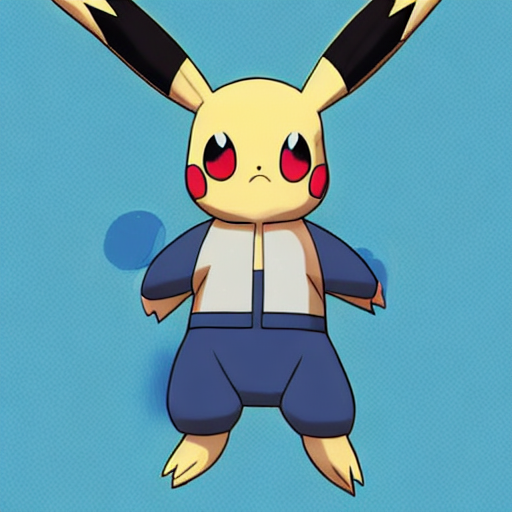

In [7]:
%%time
smashed_model(prompt, num_inference_steps=30)[0]